<a href="https://colab.research.google.com/github/patil-om-3012/Brain-tumor-classification/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing modules


In [49]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import keras
import tensorflow as tf
import cv2
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from sklearn.model_selection import train_test_split

# Data preprcoessing

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"ompatil3012","key":"ac53ad2a184c2843af68ee7912294723"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors
 79% 12.0M/15.1M [00:00<00:00, 20.9MB/s]
100% 15.1M/15.1M [00:00<00:00, 15.9MB/s]


In [ ]:
!unzip brain-mri-images-for-brain-tumor-detection.zip -d data

Archive:  brain-mri-images-for-brain-tumor-detection.zip
  inflating: data/brain_tumor_dataset/no/1 no.jpeg  
  inflating: data/brain_tumor_dataset/no/10 no.jpg  
  inflating: data/brain_tumor_dataset/no/11 no.jpg  
  inflating: data/brain_tumor_dataset/no/12 no.jpg  
  inflating: data/brain_tumor_dataset/no/13 no.jpg  
  inflating: data/brain_tumor_dataset/no/14 no.jpg  
  inflating: data/brain_tumor_dataset/no/15 no.jpg  
  inflating: data/brain_tumor_dataset/no/17 no.jpg  
  inflating: data/brain_tumor_dataset/no/18 no.jpg  
  inflating: data/brain_tumor_dataset/no/19 no.jpg  
  inflating: data/brain_tumor_dataset/no/2 no.jpeg  
  inflating: data/brain_tumor_dataset/no/20 no.jpg  
  inflating: data/brain_tumor_dataset/no/21 no.jpg  
  inflating: data/brain_tumor_dataset/no/22 no.jpg  
  inflating: data/brain_tumor_dataset/no/23 no.jpg  
  inflating: data/brain_tumor_dataset/no/24 no.jpg  
  inflating: data/brain_tumor_dataset/no/25 no.jpg  
  inflating: data/brain_tumor_dataset/no/2

In [45]:
DATADIR = 'data/brain_tumor_dataset'
CATEGORIES = {'no': 'Normal', 'yes': 'Tumor'}

In [46]:
#custom function to plot images

def plot_images(category, label, num_images=3):
    path = os.path.join(DATADIR, category)
    images = os.listdir(path)[:num_images]

    fig, axes = plt.subplots(1, num_images, figsize=(20, 10))

    for idx, img_name in enumerate(images):
        img_path = os.path.join(path, img_name)
        img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        axes[idx].imshow(img_array, cmap='gray')
        axes[idx].axis('off')

    plt.suptitle(label, fontsize=20)
    plt.tight_layout()
    plt.show()

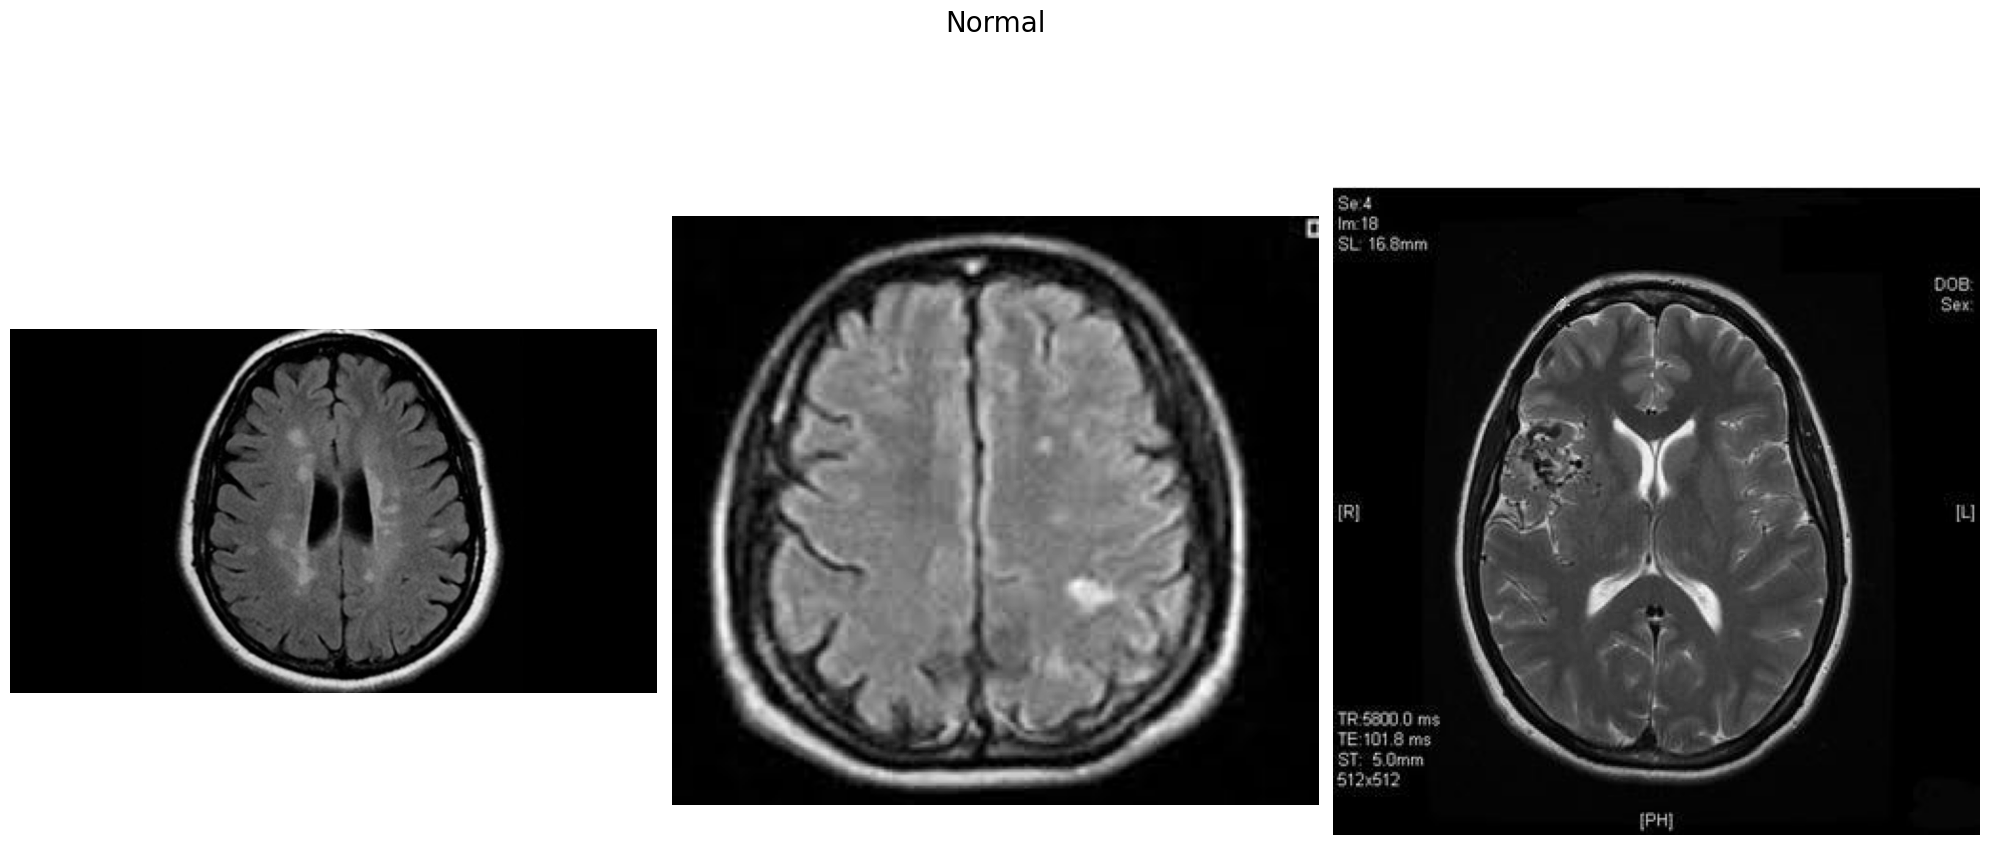

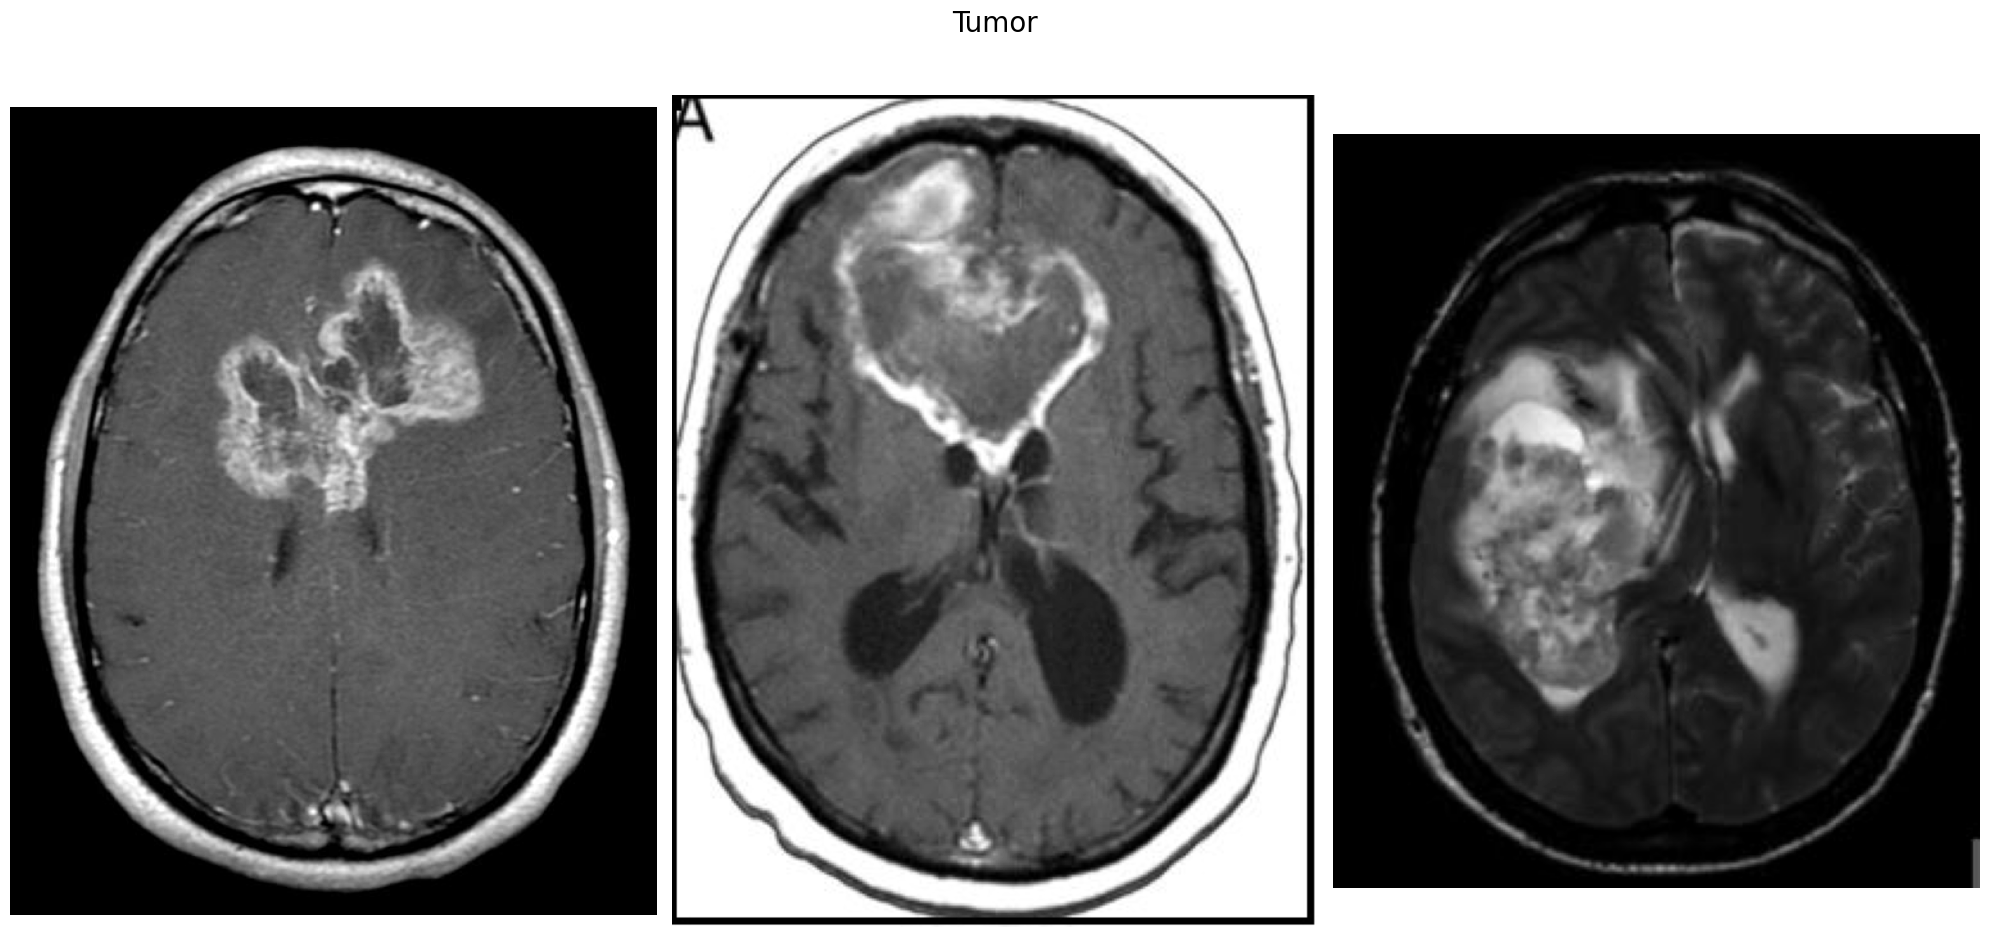

In [47]:
for key, value in CATEGORIES.items():
    plot_images(key, value)

# Neural network architecture

In [50]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('data/brain_tumor_dataset',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 253 images belonging to 2 classes.


In [51]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

cnn.fit(x = training_set, epochs = 100)

Epoch 1/100
8/8 [==============================] - 3s 176ms/step - loss: 0.6604 - accuracy: 0.6640
Epoch 2/100
8/8 [==============================] - 2s 190ms/step - loss: 0.5611 - accuracy: 0.7352
Epoch 3/100
8/8 [==============================] - 2s 192ms/step - loss: 0.5638 - accuracy: 0.7273
Epoch 4/100
8/8 [==============================] - 2s 187ms/step - loss: 0.5285 - accuracy: 0.7391
Epoch 5/100
8/8 [==============================] - 2s 195ms/step - loss: 0.5070 - accuracy: 0.7431
Epoch 6/100
8/8 [==============================] - 2s 322ms/step - loss: 0.5333 - accuracy: 0.7273
Epoch 7/100
8/8 [==============================] - 2s 255ms/step - loss: 0.4789 - accuracy: 0.8024
Epoch 8/100
8/8 [==============================] - 2s 189ms/step - loss: 0.4483 - accuracy: 0.7866
Epoch 9/100
8/8 [==============================] - 2s 188ms/step - loss: 0.4771 - accuracy: 0.7787
Epoch 10/100
8/8 [==============================] - 2s 196ms/step - loss: 0.4397 - accuracy: 0.7826
Epoch 11/

In [52]:
print(cnn.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [56]:
#testing the model with a single image
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('data/yes/Y10.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Yes'
else:
  prediction = 'No'

1/1 [==============================] - 0s 111ms/step


In [57]:
print(prediction)

Yes


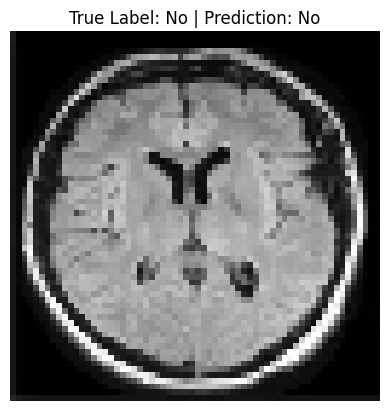

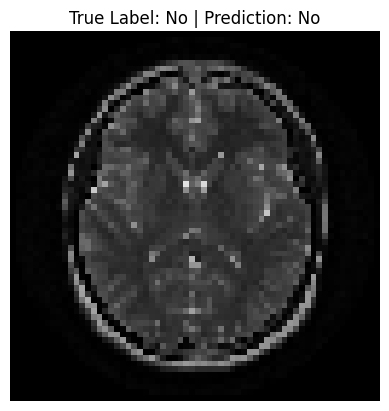

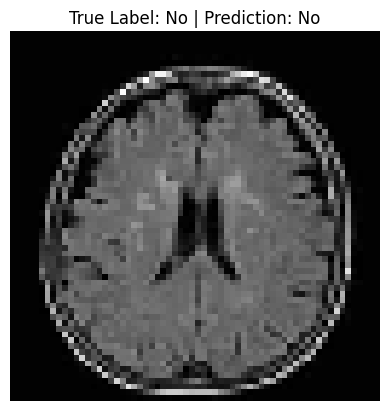

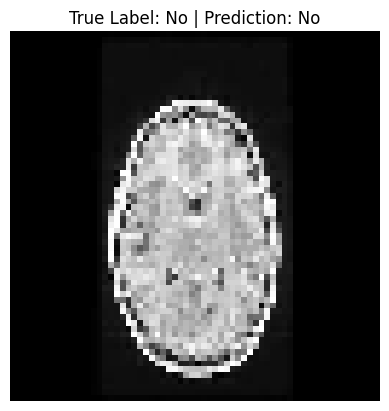

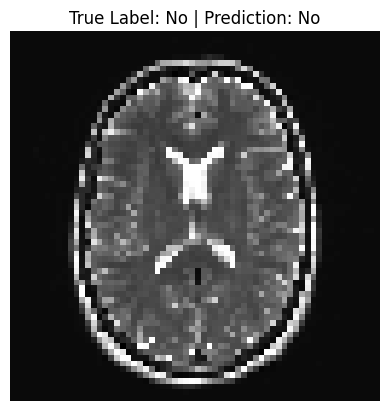

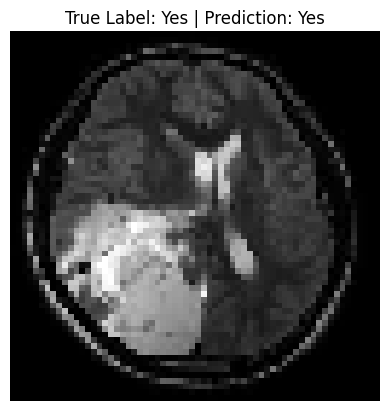

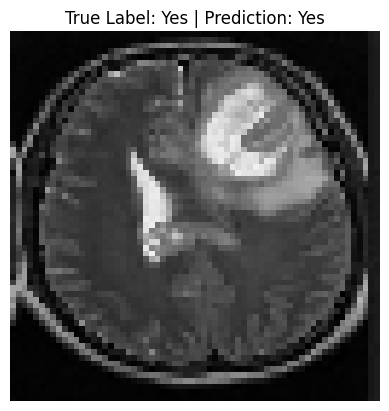

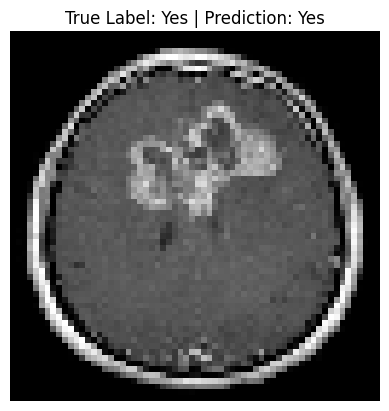

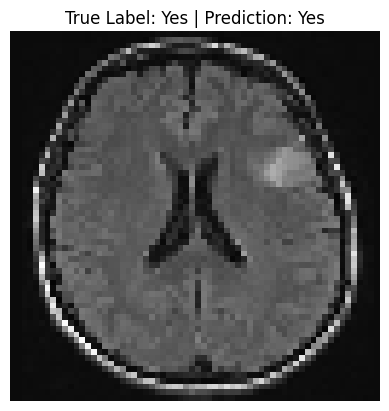

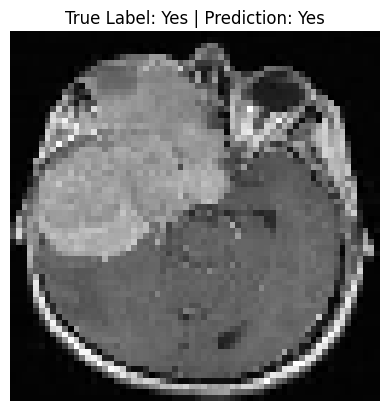

              precision    recall  f1-score   support

          No       0.00      0.00      0.00       155
         Yes       0.02      0.03      0.02        98

    accuracy                           0.01       253
   macro avg       0.01      0.02      0.01       253
weighted avg       0.01      0.01      0.01       253



In [59]:
#testing our model on complete dataset images
from keras.preprocessing import image
import random
from sklearn.metrics import classification_report

def load_and_preprocess_image(file_path, target_size=(64, 64)):
    img = image.load_img(file_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def predict_image(model, file_path):
    img_array = load_and_preprocess_image(file_path)
    result = model.predict(img_array, verbose=0)
    return 'Yes' if result[0][0] == 1 else 'No'

def visualize_image_predictions(model, dir_path, label, num_images=5):
    files = random.sample(os.listdir(dir_path), num_images)
    for file_name in files:
        file_path = os.path.join(dir_path, file_name)
        prediction = predict_image(model, file_path)

        img = image.load_img(file_path, target_size=(64, 64))
        plt.imshow(img)
        plt.title(f'True Label: {label} | Prediction: {prediction}')
        plt.axis('off')
        plt.show()

def generate_classification_report(model, no_dir, yes_dir):
    predictions, true_labels = [], []

    for class_label, directory in [('No', no_dir), ('Yes', yes_dir)]:
        for file_name in os.listdir(directory):
            file_path = os.path.join(directory, file_name)
            prediction = predict_image(model, file_path)
            predictions.append(prediction)
            true_labels.append(class_label)

    print(classification_report(true_labels, predictions))

negative = 'data/brain_tumor_dataset/no'
positive = 'data/brain_tumor_dataset/yes'

visualize_image_predictions(cnn, negative, 'No')
visualize_image_predictions(cnn, positive, 'Yes')

generate_classification_report(cnn, no_dir, yes_dir)
